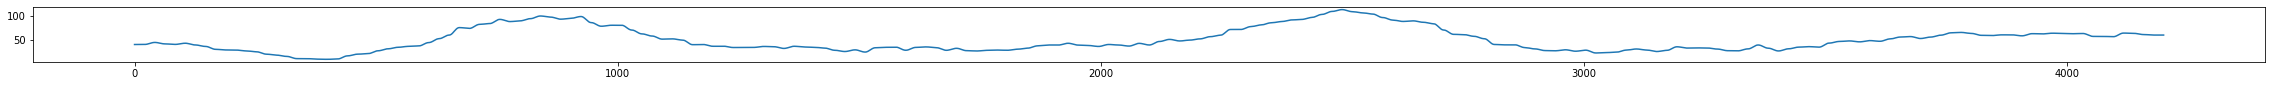

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

def GenerateRandArray(size, frequency, height):
    randPoints = []
    xOff = size / frequency
    for i in range(frequency):
        randPoints.append(random.randint(0, height))
    noiseArray = []
    step = 0
    currentPoint = 0
    nextPoint = currentPoint + 1
    for i in range(size):
        if (nextPoint >= len(randPoints)):
            nextPoint = 0
        noiseArray.append(CubicInterpolation(currentPoint * xOff, randPoints[currentPoint], nextPoint * xOff, randPoints[nextPoint], i))
        step = step + 1
        if (step >= xOff):
            step = 0
            currentPoint = currentPoint + 1
            nextPoint = currentPoint + 1
    
    return noiseArray

def AddOctave(baseNoise, frequency, height):   
    randPoints = []
    size = len(baseNoise)
    xOff = size / frequency
    for i in range(frequency):
        randPoints.append(random.randint(0, height) + baseNoise[int(i * xOff)])
    noiseArray = []
    step = 0
    currentPoint = 0
    nextPoint = currentPoint + 1
    for i in range(size):
        if (nextPoint >= len(randPoints)):
            nextPoint = 0
        noiseArray.append(CubicInterpolation(currentPoint * xOff, randPoints[currentPoint], nextPoint * xOff, randPoints[nextPoint], i))
        step = step + 1
        if (step >= xOff):
            step = 0
            currentPoint = currentPoint + 1
            nextPoint = currentPoint + 1
    
    return noiseArray



def CubicInterpolation(x0, y0, x1, y1, t):

    normalized_t = (t - x0) / (x1 - x0)

    mu2 = (1 - math.cos(normalized_t * math.pi)) / 2

    return y0 * (1 - mu2) + y1 * mu2

finalNoise = GenerateRandArray(4200, 10, 100)
finalNoise = AddOctave(finalNoise, 100, 10)
finalNoise = AddOctave(finalNoise, 200, 5)

fig, ax = plt.subplots()
ax.plot(finalNoise)
fig.set_figheight(40)
fig.set_figwidth(40)

ax.set_aspect('equal', adjustable='box')

plt.show()

In [ ]:
from random import randint, seed
from PIL import Image
import numpy as np

# Initialize the random seed and gradients
seed(1)
gradients = [[ [randint(-1, 1), randint(-1, 1)] for _ in range(256)] for _ in range(256)]

def get_influence_value(x, y, Xgrad, Ygrad):
    return (gradients[Xgrad % 256][Ygrad % 256][0] * (x - Xgrad)) + (gradients[Xgrad % 256][Ygrad % 256][1] * (y - Ygrad))

def lerp(v0, v1, t):
    return (1 - t) * v0 + t * v1

def fade(t):
    return 3 * t**2 - 2 * t**3

def perlin(x, y):
    X0 = int(x)
    Y0 = int(y)
    X1 = X0 + 1
    Y1 = Y0 + 1

    # Get the fade factors for both x and y
    sx = fade(float(x) - X0)
    sy = fade(float(y) - Y0)

    # Get dot products for each corner of the grid cell
    topLeftDot = get_influence_value(x, y, X0, Y1)
    topRightDot = get_influence_value(x, y, X1, Y1)
    bottomLeftDot = get_influence_value(x, y, X0, Y0)
    bottomRightDot = get_influence_value(x, y, X1, Y0)

    # Interpolate between the four corners and return the result
    return lerp(lerp(bottomLeftDot, bottomRightDot, sx), lerp(topLeftDot, topRightDot, sx), sy)

def generate_perlin_noise_with_octaves(width, height, scale=100.0, octaves=4, persistence=0.5):
    """Generate a 2D Perlin noise array with octaves."""
    noise = np.zeros((height, width))
    amplitude = 1.0
    frequency = 1.0
    max_value = 0  # To normalize the result

    for octave in range(octaves):
        for x in range(width):
            for y in range(height):
                # Apply frequency and scale to the coordinates for each octave
                noise[y, x] += perlin(x / scale * frequency, y / scale * frequency) * amplitude
        max_value += amplitude
        amplitude *= persistence  # Amplitude decreases with each octave
        frequency *= 2  # Frequency doubles for each octave
    
    # Normalize the noise to be between -1 and 1
    noise /= max_value
    return noise

# Generate Perlin noise for a 4000x1000 image with octaves
width, height = 1000, 1000
octaves = 6
perlin_noise = generate_perlin_noise_with_octaves(width, height, scale=50.0, octaves=octaves, persistence=0.5)

# Rescale the noise from [-1, 1] to [0, 255] and convert it to uint8
rescaled_noise = np.zeros((height, width))
for x in range(width):
    for y in range(height):
        if (perlin_noise[y, x] < -0.1):
            rescaled_noise[y, x] = 0
        else:
            rescaled_noise[y, x] = 255

# Create and display the binary image
Image.fromarray(rescaled_noise).show()


In [13]:
import math
import random
sizeX = 50
sizeY = 200
minRoomSize = 20
maxRoomSize = 30



class BSTNode:
    def __init__(self, x, y, width, height):
        self.x = x
        self.y = y
        self.width = width
        self.height = height
        self.left = None
        self.right = None
        self.isLeaf = True
    def split(self):
        #vertical split
        if self.isLeaf == False:
            self.left.split()
            self.right.split()
            return
        if (self.width - 2 * minRoomSize <= 0):
            return
        if (self.height - 2 * minRoomSize <= 0):
            return
        
        if random.random() < 0.5:  
            splitPos = random.randrange(minRoomSize, self.width - minRoomSize)
            self.left = BSTNode(self.x, self.y, splitPos, self.height)
            self.right = BSTNode(self.x + splitPos, self.y, self.width - splitPos, self.height)
        #horizontal split
        else:
            splitPos = random.randrange(minRoomSize, self.height - minRoomSize)
            self.left = BSTNode(self.x, self.y, self.width, splitPos)
            self.right = BSTNode(self.x, self.y + splitPos, self.width, self.height - splitPos)
        self.isLeaf = False
    def generateRooms(self):
        rooms = []
        if (self.isLeaf == False):
            rooms += self.left.generateRooms()
            rooms += self.right.generateRooms()
        else:
            roomWidth = random.randrange(minRoomSize, min(maxRoomSize, self.width) + 1)
            roomHeight = random.randrange(minRoomSize, min(maxRoomSize, self.height) + 1)
            roomX = self.x if (self.width - roomWidth) <= 1 else random.randrange(self.x, self.x + self.width - roomWidth)
            roomY = self.y if (self.height - roomHeight) <= 1 else random.randrange(self.y, self.y + self.height - roomHeight)
            rooms.append((roomX, roomY, roomWidth, roomHeight))
        return rooms


def generateMap(sizeX, sizeY):
    BSTMap = []
    for x in range(sizeX):
        BSTMap.append([])
        for y in range(sizeY):
            BSTMap[x].append(0)
    return BSTMap

BSTMap = generateMap(50, 200)
head = BSTNode(0, 0, 50, 200)
for _ in range(10):
    head.split()

rooms = head.generateRooms()


for room in rooms:
    for x in range(room[2]):
        for y in range(room[3]):
            BSTMap[room[0] + x][room[1] + y] = 1







for x in range(sizeX):
    for y in range(sizeY):
        print('#' if BSTMap[x][y] == 1 else '.', end="")
    print()


....................................................................................................#########################...........................................................................
......................................#######################.......................................#########################...........................................................................
......................................#######################.......................................#########################...........................................................................
......................................#######################.......................................#########################...........................................................................
......................................#######################.......................................#########################.......................................................................